In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import itertools

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
datagen = ImageDataGenerator(   validation_split = 0.2, 
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'
                            )
train_generator = datagen.flow_from_directory(
        directory='images/', 
        color_mode='rgb',
        target_size=(150, 150), 
        batch_size=32,
        subset="training")
validation_generator = datagen.flow_from_directory(
        directory='images/', 
        color_mode='rgb',
        target_size=(150, 150), 
        batch_size=128,
        subset="validation")

Found 463 images belonging to 5 classes.
Found 112 images belonging to 5 classes.


In [4]:
VGG_model = load_model('VGG16_Best_Weights.hdfs')
lables = ["All sofas", "Dining tables", "Dinnerware", "Outdoor dining furniture", "Sink cabinets"]
y_true = []

for data_batch, labels_batch in validation_generator:
    y_true = labels_batch
    break

In [5]:
pred = VGG_model.predict_generator(validation_generator)

In [6]:
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_true, axis=1)

In [7]:
cm = confusion_matrix(y_true, pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[36  0  0  1  0]
 [ 0 13  0  1  1]
 [ 0  0 15  0  0]
 [ 0  4  0 21  1]
 [ 2  1  0  1 15]]


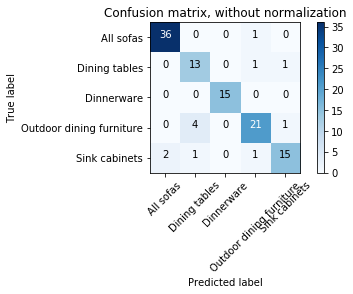

In [10]:
plt.figure()
plot_confusion_matrix(cm, classes=lables,
                      title='Confusion matrix, without normalization')
plt.savefig("VGG Model Without Normalization")
plt.show()


Normalized confusion matrix
[[0.97 0.   0.   0.03 0.  ]
 [0.   0.87 0.   0.07 0.07]
 [0.   0.   1.   0.   0.  ]
 [0.   0.15 0.   0.81 0.04]
 [0.11 0.05 0.   0.05 0.79]]


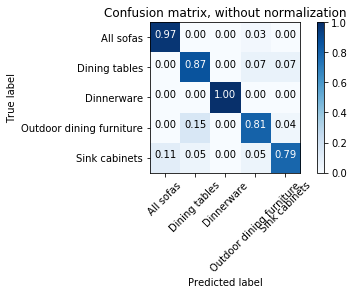

In [11]:
plt.figure()
plot_confusion_matrix(cm, classes=lables,normalize=True,
                      title='Confusion matrix, without normalization')
plt.savefig("VGG Model With Normalization")
plt.show()